In [1]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 306, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 306 (delta 11), reused 54 (delta 9), pack-reused 235
Receiving objects: 100% (306/306), 278.61 MiB | 14.62 MiB/s, done.
Resolving deltas: 100% (137/137), done.
Updating files: 100% (219/219), done.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...
...,...,...,...,...,...,...,...,...,...,...,...,...
79142,6.012301e+10,.Net Fullstack Developer,Citiustech,3-8 Yrs,"7,00,000 - 17,00,000 PA.","Hybrid - Pune, Bangalore/Bengaluru, Mumbai (Al...",4.0,742 Reviews,"c#,.net core,javascript,Microservices,Angular,...",2 Days Ago,https://www.naukri.com/job-listings-net-fullst...,https://www.naukri.com/citiustech-jobs-careers...
79143,1.122201e+10,Senior (BI) Business Intelligence Architect,Hexaware Technologies,10-13 Yrs,Not disclosed,"Hybrid - Pune, Chennai, Bangalore/Bengaluru, M...",3.7,3172 Reviews,"Informatica Mdm,etl,business intelligence,Agil...",1 Day Ago,https://www.naukri.com/job-listings-senior-bi-...,https://www.naukri.com/hexaware-technologies-j...
79144,1.512220e+11,PowerBI Developer,EY,5-10 Yrs,Not disclosed,"Hybrid - Pune, Mumbai (All Areas)",3.8,6267 Reviews,"pagination,Power Bi,Dax",2 Days Ago,https://www.naukri.com/job-listings-powerbi-de...,https://www.naukri.com/ey-jobs-careers-9156
79145,2.712220e+11,Customer Service Associate,Tech Mahindra,0-2 Yrs,"2,50,000 - 3,50,000 PA.","Temp. WFH - Noida, Kolkata, New Delhi, Hyderab...",3.7,21440 Reviews,"Bengali,International BPO,BPO,Customer Service...",10 Days Ago,https://www.naukri.com/job-listings-customer-s...,https://www.naukri.com/tech-mahindra-jobs-care...


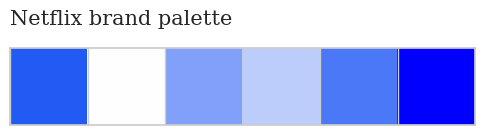

In [70]:
sns.palplot(['#225af4', '#fefefe', '#80a0f9', '#bdcdfb', '#4a78f6','#0000FF'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

### 1. Handling Duplicate & Null Values

##### 1.1) Checking Null Values

In [3]:
df.isnull().sum()

job_id               480
job_role             480
company              481
experience          1749
salary               480
location            1706
rating             36199
reviews            36199
resposibilities      500
posted_on            480
job_link             480
company_link         480
dtype: int64

##### 1.2) Removing Null values

In [4]:
df = df.dropna(subset=['job_id', 'job_role', 'company', 'experience', 'salary', 'location',
                      'resposibilities', 'posted_on', 'job_link', 'company_link'])

##### 1.3) Checking Duplicate Values



In [5]:
print(df.duplicated().sum())

print(df.duplicated(subset=['job_id']).sum())

print(df.duplicated(subset=['job_link']).sum())

5312
5640
5640


##### 1.4) Remove the Null Values

In [6]:
df = df.drop_duplicates(subset=['job_link'])

### 2. Exploratory Data Analysis

##### 2.1) Exploring job_id Column

In [7]:
df['job_id'].nunique() == len(df)

True

- convert it to string data-type
- get it from link column

##### 2.2) Exploring job_role Column

In [8]:
df['job_role'].nunique()

50240

##### 2.3) Exploring company Column

In [9]:
df['company'].nunique()

14927

##### 2.4) Exploring company & company_link Column together

In [10]:
print(df['company'].nunique())
print(df['company_link'].nunique())

14927
13525


##### 2.5) Exploring companies whose links are mathcing but names are different

In [11]:
df['company_id'] =  df['company_link'].str.lower().str.split('-').str[-1]

# for company_id in tqdm(df['company_id'].unique()):
#   no_of_un_links = df[df['company_id'] == company_id]['company_link'].nunique()
#   if (no_of_un_links != 1):
#     print(company_id, no_of_un_links)

df.groupby('company_id').nunique()['company_link'].sort_values(ascending = False).head()

company_id
0          50
2778010     2
932996      2
5546386     1
5542006     1
Name: company_link, dtype: int64

In [15]:
df['job_link'].nunique()

71738

### 3. Extract Key Responsibilities

##### 3.1) Top 20 most frequency responsibilities

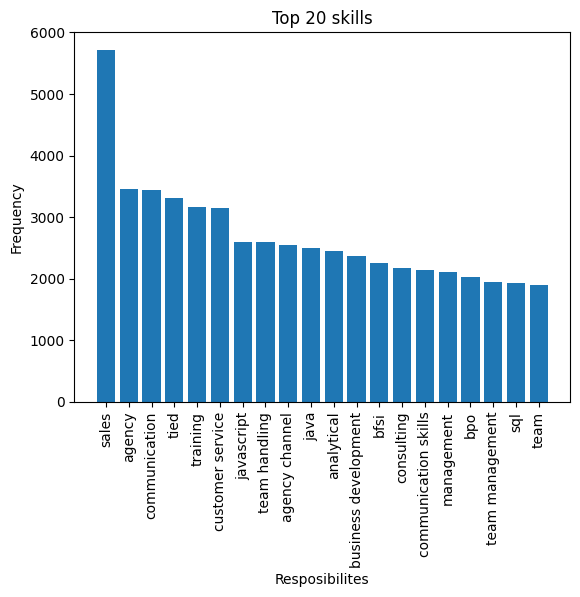

In [51]:
# group the dataframe by company and count the number of jobs
resposibilities_df = df['resposibilities'].str.lower().str.split(',').explode().value_counts().sort_values(ascending = False).head(20).reset_index()

# create a barplot of the number of jobs per company
plt.bar(resposibilities_df['resposibilities'], resposibilities_df['count'])
plt.title('Top 20 skills')
plt.xlabel('Resposibilites')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

<ipython-input-72-50e3f14c4016>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=responsibilities_df, x='resposibilities', y='count', palette=palette)
<ipython-input-72-50e3f14c4016>:16: UserWarning: 
The palette list has fewer values (5) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=responsibilities_df, x='resposibilities', y='count', palette=palette)


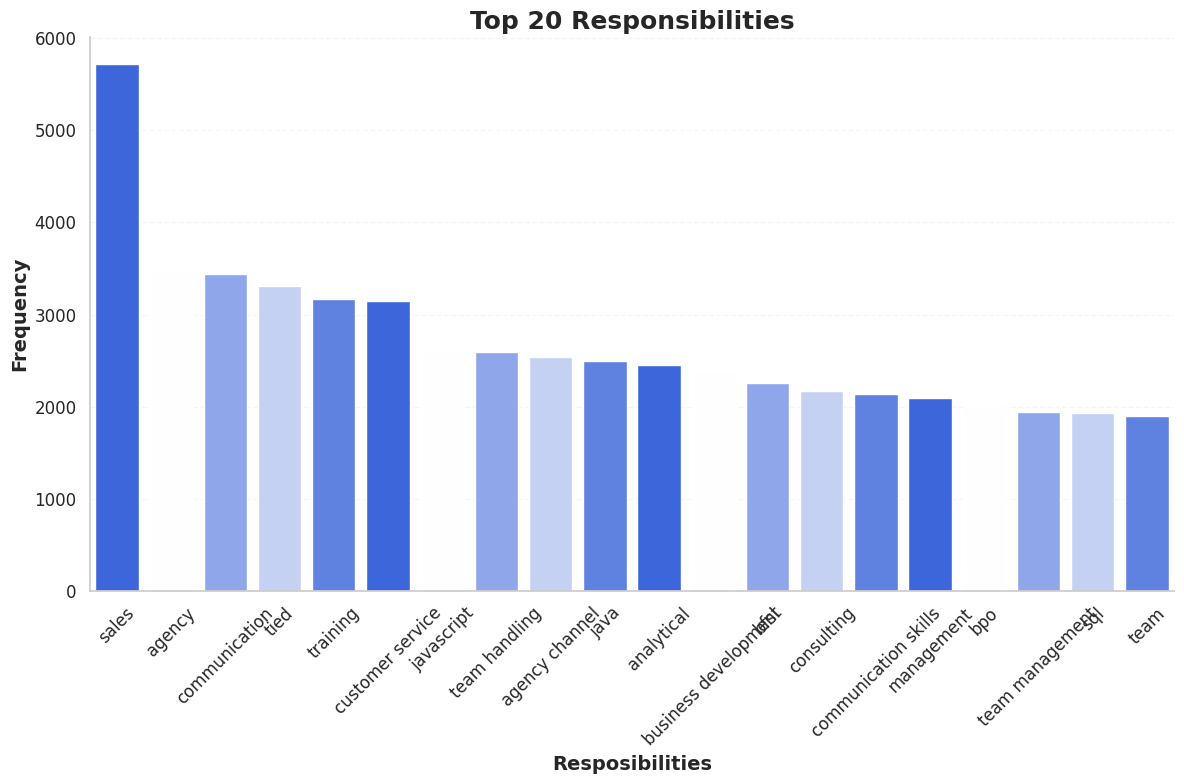

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom color palette
palette = ['#225af4', '#fefefe', '#80a0f9', '#bdcdfb', '#4a78f6']

# Group the dataframe by company and count the number of jobs
responsibilities_df = df['resposibilities'].str.lower().str.split(',').explode().value_counts().sort_values(ascending=False).head(20).reset_index()
responsibilities_df.columns = ['resposibilities', 'count']

# Set plot style
sns.set(style="whitegrid")

# Create a barplot of the number of jobs per company using Seaborn with the custom palette
plt.figure(figsize=(12, 8))
sns.barplot(data=responsibilities_df, x='resposibilities', y='count', palette=palette)

# Customize the plot
plt.title('Top 20 Responsibilities', fontsize=18, fontweight='bold')
plt.xlabel('Resposibilities', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.2)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


##### 3.2) Top 6 most frequency in-general responsibilitiesspecific field

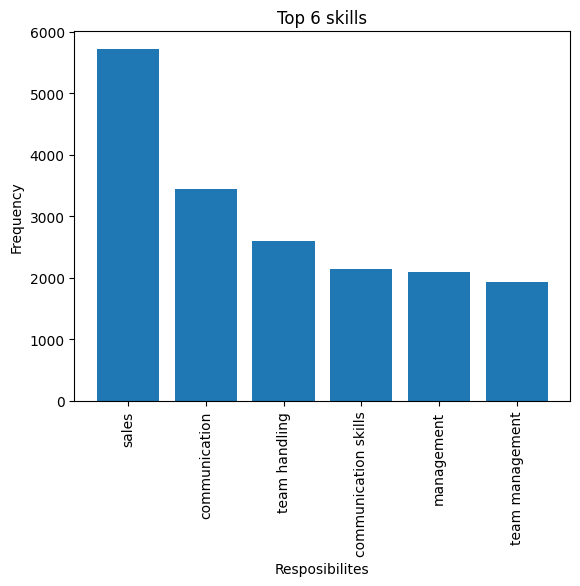

In [54]:
df_res =   pd.DataFrame([['sales',	5722],
        ['communication',	3444],
        ['team handling',	2596],
        ['communication skills',	2141],
        ['management',	2099],
        ['team management',	1942]])

df_res.columns = ['resposibilities', 'count']


# create a barplot of the number of jobs per company
plt.bar(df_res['resposibilities'], df_res['count'])
plt.title('Top 6 skills')
plt.xlabel('Resposibilites')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

##### 3.3) Top 20 most frequency responsibilities for Specific Company

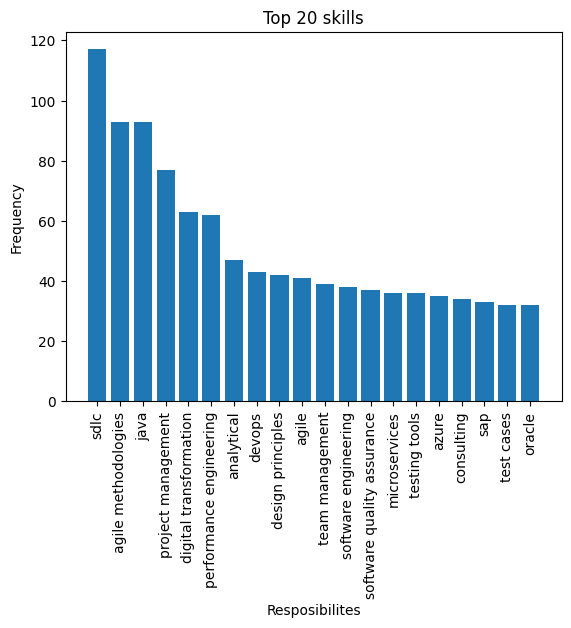

In [55]:
# group the dataframe by company and count the number of jobs
resposibilities_df = df[df['company'] == 'Infosys']['resposibilities'].str.lower().str.split(',').explode().value_counts().sort_values(ascending = False).head(20).reset_index()

# create a barplot of the number of jobs per company
plt.bar(resposibilities_df['resposibilities'], resposibilities_df['count'])
plt.title('Top 20 skills')
plt.xlabel('Resposibilites')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

##### 3.4) Top 20 most frequency responsibilities for Specific Job Role

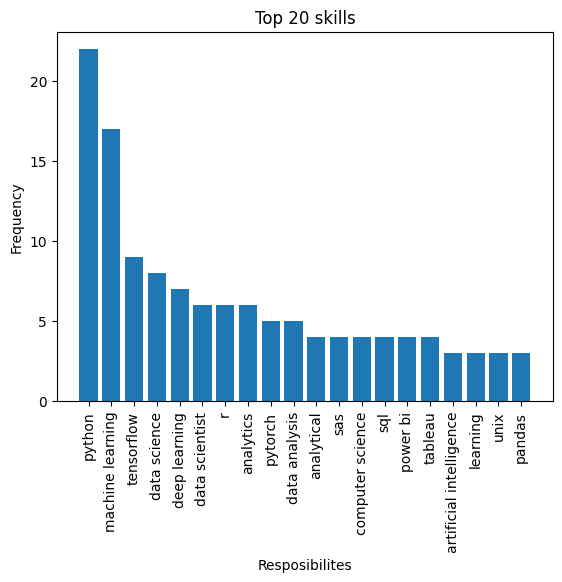

In [58]:
# group the dataframe by company and count the number of jobs
resposibilities_df = df[df['job_role'] == 'Data Scientist']['resposibilities'].str.lower().str.split(',').explode().value_counts().sort_values(ascending = False).head(20).reset_index()

# create a barplot of the number of jobs per company
plt.bar(resposibilities_df['resposibilities'], resposibilities_df['count'])
plt.title('Top 20 skills')
plt.xlabel('Resposibilites')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

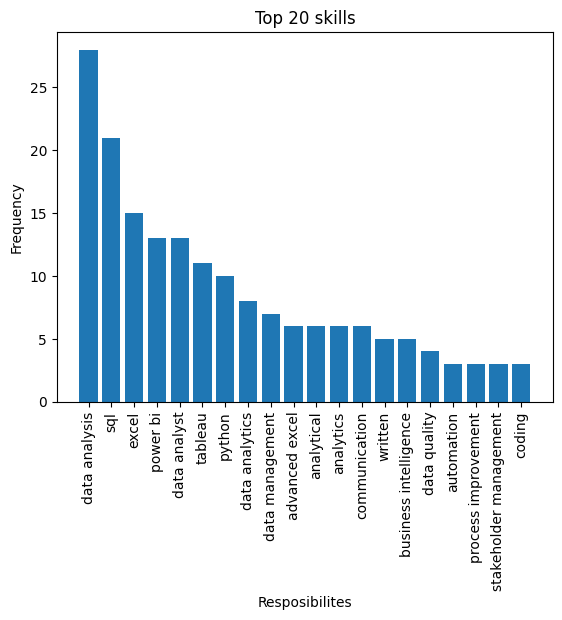

In [59]:
# group the dataframe by company and count the number of jobs
resposibilities_df = df[df['job_role'] == 'Data Analyst']['resposibilities'].str.lower().str.split(',').explode().value_counts().sort_values(ascending = False).head(20).reset_index()

# create a barplot of the number of jobs per company
plt.bar(resposibilities_df['resposibilities'], resposibilities_df['count'])
plt.title('Top 20 skills')
plt.xlabel('Resposibilites')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [62]:
df['resposibilities'].str.lower().str.split(',').explode().unique()[:50]

array(['customer service', 'sales', 'relationship management',
       'product management', 'market analysis', 'change management',
       'agile', 'analytics', 'business process', 'strategy consulting',
       'interpersonal skills', 'team management',
       'stakeholder management', 'continuous improvement',
       'data analytics', 'program management', 'sap bo', 'pl / sql',
       'oracle sql', 'sap business objects 4 x ( information design tool',
       'universe design tool', 'web intelligence',
       'sap bo administration', 'sap bo dashboards', 'itam', 'itsm',
       'hrsd', 'grc', 'itom', 'csd', 'c++', 'stl', 'node js', 'svn', 'go',
       'git', 'python', 'order management', 'warehouse management',
       'supply chain management', 'performance management',
       'conflict management', 'consulting', 'written communication',
       'excel', 'performance improvement', 'forensic',
       'analytical skills', 'service delivery', 'audit compliance'],
      dtype=object)

In [64]:
import re

text = ['excellent', 'ms excel', 'microsoft excel', 'excel', 'advance excel']
pattern = r"\b(excel)\b"

for item in text:
  match = re.search(pattern, item)
  if match:
    print(item, match.group(1))

ms excel excel
microsoft excel excel
excel excel
advance excel excel
